In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
#ЗАГРУЗКА ДАННЫХ И ПРЕДВАРИТЕЛЬНАЯ ОБРАТБОТКА
dataset = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=';').drop(["id"], axis=1)

Сводка по датасету
* **Возраст** | age | int (days)
* **Рост** | height | int (cm) |
* **Вес** | weight | float (kg) |
* **Пол** | gender | categorical code |
* **Систолическое артериальное давление** | ap_hi | int |
* **Диастолическое артериальное давление** | ap_lo | int |
* **Холестерин** | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* **Глюкоза** | gluc | 1: normal, 2: above normal, 3: well above normal |
* **Курение** | smoke | binary |
* **Употребление алкоголя** | alco | binary |
* **Физическая активность** | active | binary |
* **Наличие сердечно-сосудистого заболевания** | cardio | binary | - таргет предсказания

In [3]:
#ПОСМОТРИМ НА ПЕРВЫЕ ЗНАЧЕНИЯ
dataset.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#ВОЗРАСТА ПРЕДСТАВЛЕН В ДНЯХ ПЕРЕВЕДЕМ ЕГО В ГОДА
dataset['age'] = (dataset['age'] / 365).round().astype(np.int64)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
duplicate_count = dataset.duplicated().sum()
print(duplicate_count)
dataset = dataset.drop_duplicates()

3816


Количетсво дубликатов достаточно большое, удалим их.

In [7]:
dataset.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.0,66184.00
mean,53.37,1.36,164.35,74.58,129.30,97.61,1.39,1.24,0.09,0.06,0.8,0.51
std,6.81,0.48,8.35,14.61,158.37,193.78,0.69,0.58,0.29,0.23,0.4,0.50
min,30.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.00
25%,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00
50%,54.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,1.00
75%,59.00,2.00,170.00,83.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.00
max,65.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.00


Как можно увидеть у нас 12 столбцов. 11 столбцов имеют тип данных int64, 1 столбец имеет тип данных int64.
Также в таблице отсутствуют нулевые значения. Размер датасета (70000, 12)

Теперь можно выделить типы признаков
* smoke, alco, active, cardio - являются бинарными признаками
* gender, cholesterol, gluc - являются категориальными признаками
* age,  height, weight, ap_hi, ap_lo - являются числовыми признаками

Теперь как мы определили категориальные признаки посмотрим их соотношения

Гендерное распределение:
gender
1    0.642769
2    0.357231
Name: proportion, dtype: float64

Распределение холестерина:
cholesterol
1    0.735102
2    0.143811
3    0.121087
Name: proportion, dtype: float64

Распределение глюкозы:
gluc
1    0.841714
3    0.079883
2    0.078403
Name: proportion, dtype: float64


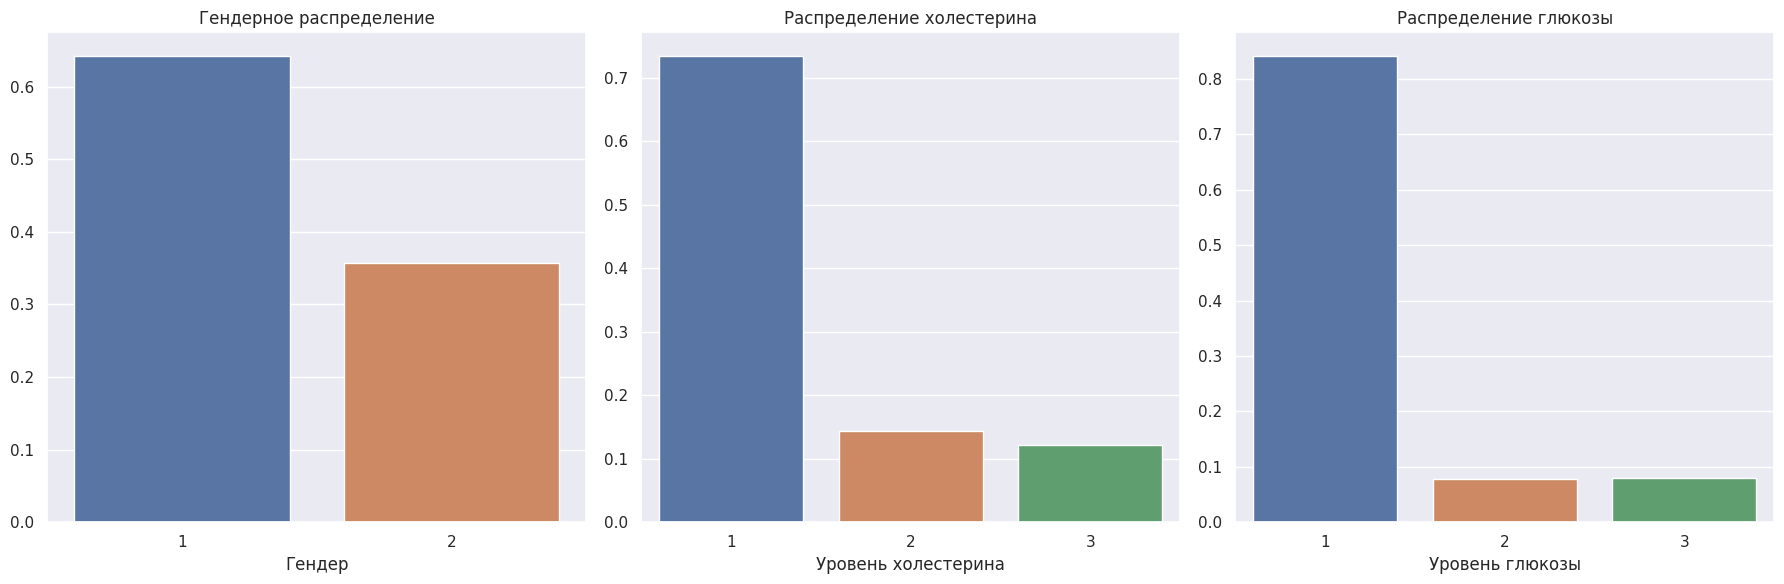

In [8]:
gender_counts = dataset["gender"].value_counts(normalize=True)
cholesterol_counts = dataset["cholesterol"].value_counts(normalize=True)
gluc_counts = dataset["gluc"].value_counts(normalize=True)

print("Гендерное распределение:")
print(gender_counts)

print("\nРаспределение холестерина:")
print(cholesterol_counts)

print("\nРаспределение глюкозы:")
print(gluc_counts)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Гендерное распределение')
plt.xlabel('Гендер')


plt.subplot(1, 3, 2)
sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values)
plt.title('Распределение холестерина')
plt.xlabel('Уровень холестерина')

plt.subplot(1, 3, 3)
sns.barplot(x=gluc_counts.index, y=gluc_counts.values)
plt.title('Распределение глюкозы')
plt.xlabel('Уровень глюкозы')

plt.tight_layout()
plt.show()

Можно сказать, что в данных наблюдается несоответствие в распределении классов по признакам гендера, холестерина и уровня глюкозы.

Теперь перейдем к росту и весу.

Предполагается, что рост имеет нормальное распередение, попробуем потдвердить или опровергнуть это

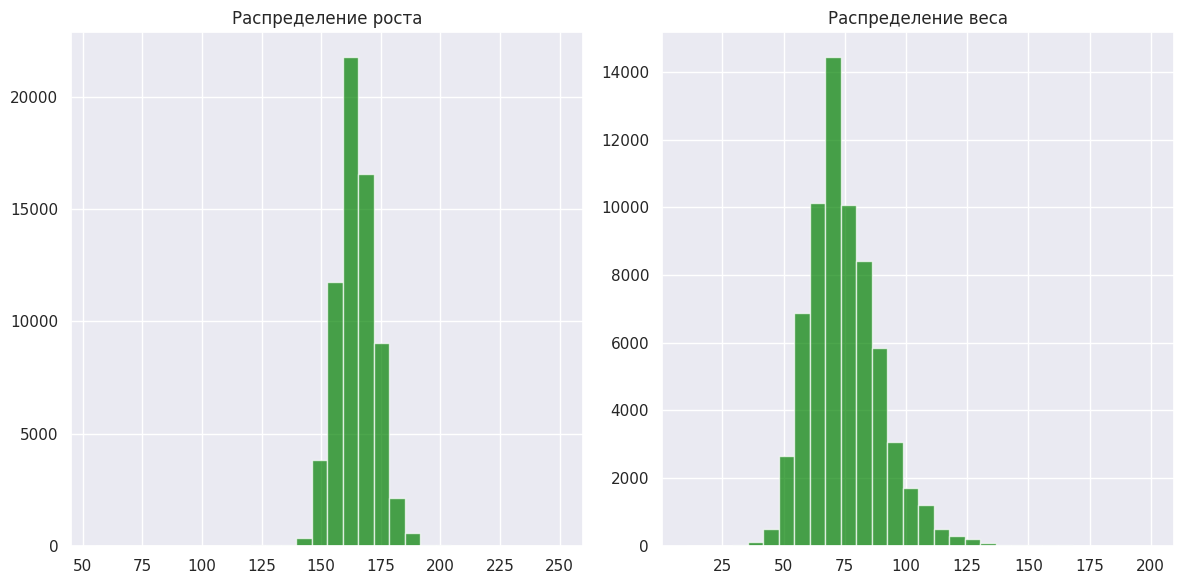

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset['height'], bins=30, color='green', alpha=0.7)
plt.title('Распределение роста')

plt.subplot(1, 2, 2)
plt.hist(dataset['weight'], bins=30, color='green', alpha=0.7)
plt.title('Распределение веса')
plt.tight_layout()  
plt.show()

Получилось, что-то похожее на нормальное распределение как для роста, так и для веса. 

Давайте посмотрим на количество выбросов.

Выбросы для роста:  518
Выбросы для веса:  1282


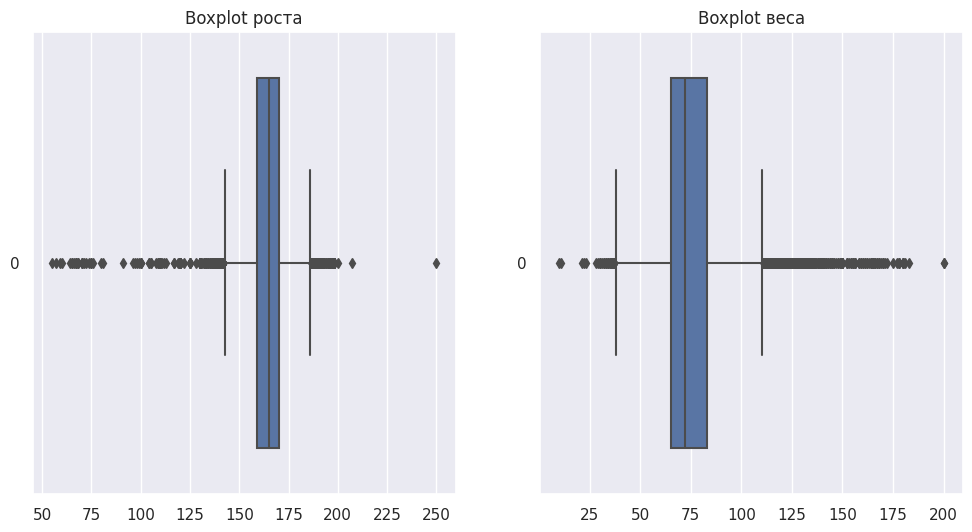

In [10]:
Q1 = dataset['height'].quantile(0.25)
Q3 = dataset['height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['height'] < lower_bound) | (dataset['height'] > upper_bound)]
print("Выбросы для роста: ", len(outliers))

Q1 = dataset['weight'].quantile(0.25)
Q3 = dataset['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['weight'] < lower_bound) | (dataset['weight'] > upper_bound)]
print("Выбросы для веса: ", len(outliers))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(dataset['height'], orient='h')
plt.title('Boxplot роста')

plt.subplot(1, 2, 2)
sns.boxplot(dataset['weight'], orient='h')
plt.title('Boxplot веса')
plt.show()

Можем увидеть, что у признака веса очень много выбросов, но большая их часть >100кг, что может быть правдой, так как повышенный холестерин приводит к ожирению, но мы можем также заметить, что есть точки, где вес ниже 35, такие точки надо удалять, так как вероятно это ошибки.

А в росте ситация противоположная, людей ниже 130см мне кажется очень мало и это больше похоже на ошибки, либо в исследовании принимали участие гномики) Также важно заметить, что это точно не дети, так как в описани датасета, который мы вывели выше минимальный age = 30

Как итог надо для отчистить датасет от выбросов, надо удалить точки, где рост <130 и > 210, а также удалить точки для признака веса, где вес < 35кг.

Продолжаем выявление ошибок в данных, теперь рассмотрим систолическое давление и диастолическое давление.
Так как 1 вид давление всегда выше 2, то если в датасете поялвяется ситуация, когда 2 давление выше 1, то будем считать это ошибкой. Посмотрим сколько таких ошибок.

In [11]:
count_wrong = len(dataset[dataset['ap_lo'] > dataset['ap_hi']])
print(count_wrong)
dataset = dataset[(dataset['ap_lo'] < dataset['ap_hi']) & 
                  (dataset['ap_lo'] >= 30) & (dataset['ap_hi'] >= 60) & 
                  (dataset['ap_lo'] <= 220) & (dataset['ap_hi'] <= 220)]

1233


Получилось достаточно много, их лучше удалить. Также лучше удалить ошибки, когда ap_lo и ap_hi меньше 0 и убрать невозможные значения.

Предположение, что в старости сердечно-сосудистые заболевания встречаются чаще, чем в молодости, давайте это проверим. Выведем количество больных и здоровых по возрастам.

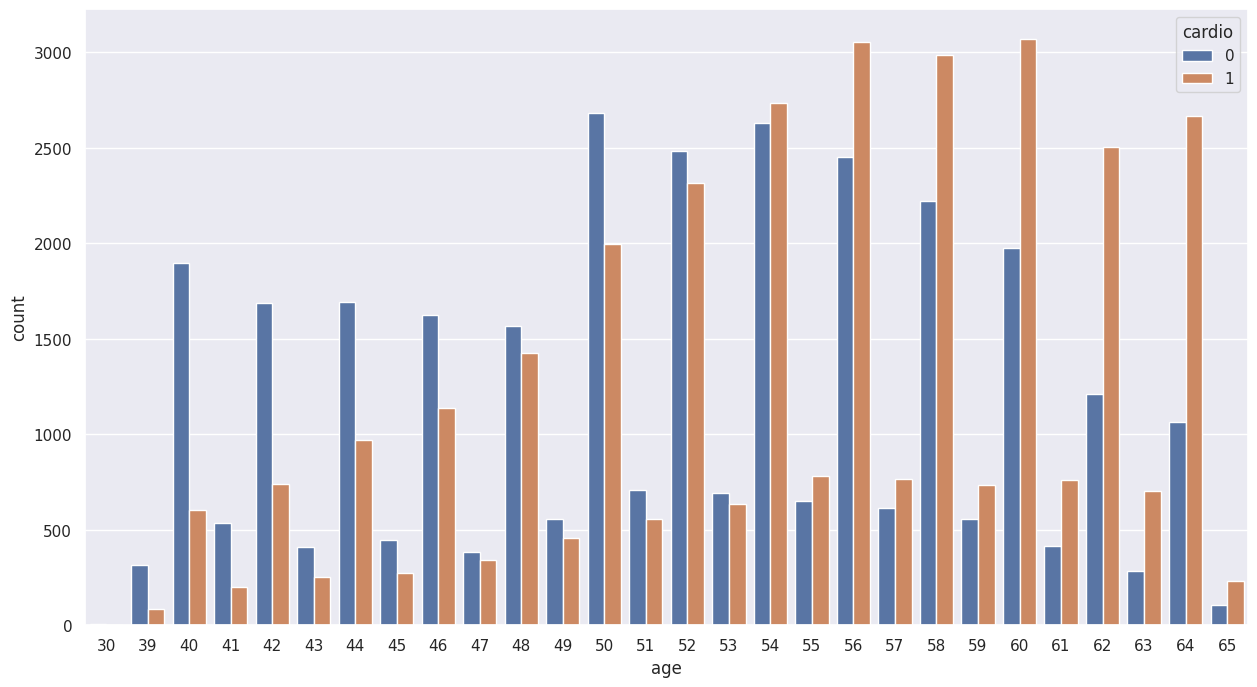

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(x='age', hue='cardio', data=dataset)
plt.show()

Предположение оказалось правдивым, также важно заметить, что начиная с восзраста в 55 лет количество больных становится больше, чем здоровых. Таким образом мы выявили, что признак age влияет на появлени ссз.

В признаке гендер непонятно, кто мужчина, а кто женщина, было полезно это узнать. За основу возьмем, что статистически женщины ниже мужчин.

In [13]:
#ПЕРЕД ЭТИМ НУЖНО УДАЛИТЬ ОШИБКИ
dataset = dataset[(dataset['height'] >= 130) & (dataset['height'] <= 210)]
dataset = dataset[(dataset['weight'] > 35)]

In [14]:
dataset.pivot_table(values=['height'], index=['gender'], aggfunc='mean')

,height
gender,
1,161.297900
2,170.087332


Теперь будем исходить, что gender = 2 - это мужчины, но давайте попробуем собрать ещё доказательства в пользу этого.

Есть несколько предположений: 1-мужчины чаще употребляют алгоколь, 2-мужчины чаще курят

In [15]:
smokers = dataset[dataset['smoke'] == 1]
print(smokers.pivot_table(values=['smoke'], index=['gender'], aggfunc='count'))
print("---------------")
alco = dataset[dataset['alco'] == 1]
print(alco.pivot_table(values=['alco'], index=['gender'], aggfunc='count'))

        smoke
gender       
1         793
2        5211
---------------
        alco
gender      
1       1125
2       2526


Предположения потдвердились, мужчины чаще курят и пьют

Создание признака индекса массы тела, он нужен для того, чтобы понимать является ли масса недостаточной, нормальной или избыточной, также он объединяет данные признака роста и веса в одно целое.

In [16]:
dataset['height'] = dataset['height'] / 100
insert_position = len(dataset.columns) - 1

dataset.insert(insert_position, 'BMI', dataset['weight'] / (dataset['height'] ** 2))

In [17]:
dataset.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
count,64748.00,64748.00,64748.00,64748.00,64748.00,64748.00,64748.00,64748.00,64748.00,64748.00,64748.0,64748.00,64748.00
mean,53.35,1.36,1.64,74.49,127.04,81.40,1.38,1.24,0.09,0.06,0.8,27.59,0.51
std,6.81,0.48,0.08,14.50,17.00,9.68,0.69,0.58,0.29,0.23,0.4,5.28,0.50
min,30.00,1.00,1.30,35.45,60.00,30.00,1.00,1.00,0.00,0.00,0.0,13.52,0.00
25%,48.00,1.00,1.59,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,23.88,0.00
50%,54.00,1.00,1.65,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,26.56,1.00
75%,59.00,2.00,1.70,82.50,140.00,90.00,2.00,1.00,0.00,0.00,1.0,30.45,1.00
max,65.00,2.00,2.07,200.00,220.00,182.00,3.00,3.00,1.00,1.00,1.0,85.78,1.00


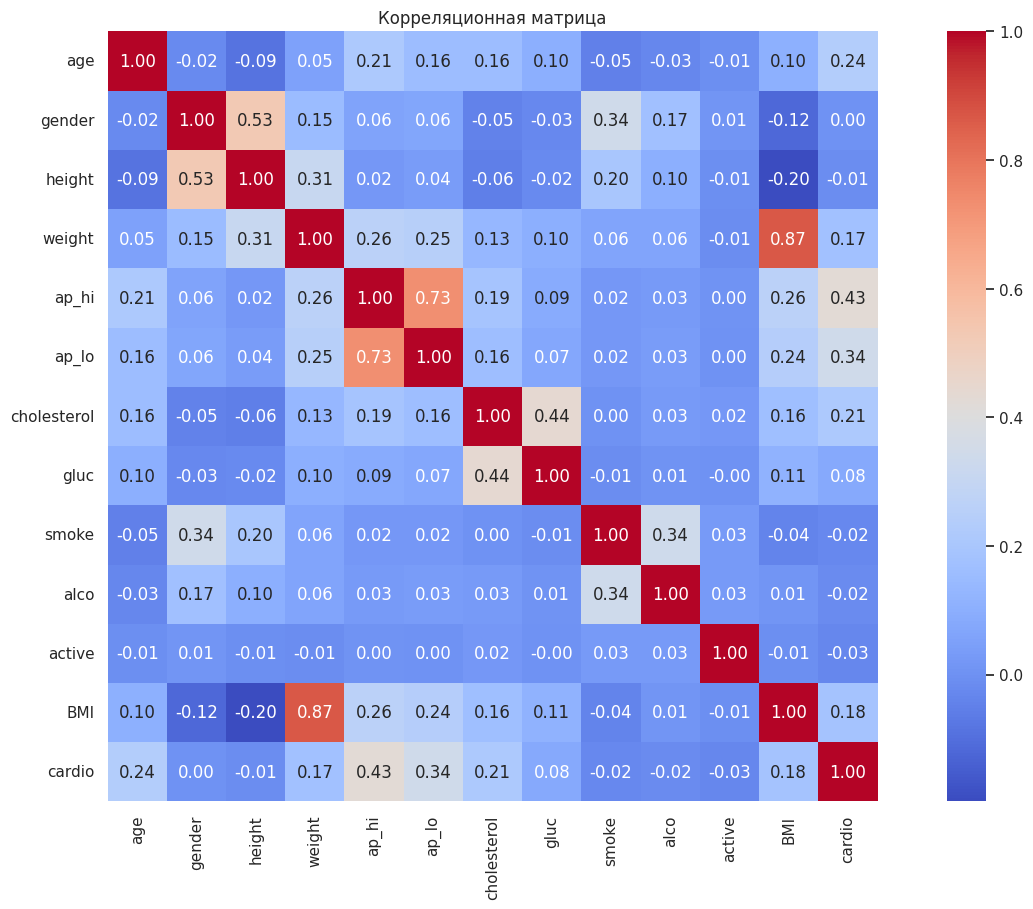

In [18]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица')
plt.show()

Из матрицы можно понять, как таргет cardio зависит от других признаков

У кардио есть положительная зависимость с признаками: age, ap_hi, ap_lo, cholesterol, gluc, BMI

С остальными пирзнаками она практически отсутствует.

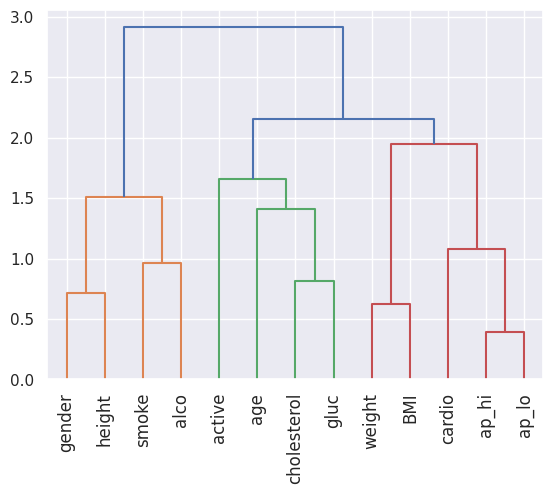

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(correlation_matrix, 'ward')
dendrogram(Z, labels=dataset.columns)  

plt.xticks(rotation=90)  
plt.show()

Дендограмма подтвеерждает результаты матрицы. Как мы видим курение и утпотребление алгоколя оказывают слабое влияние на таргет cardio, хотя казалось, что употребдение алкоголя и курения повышают риск получения ссз, также практически никого влияния не оказывает активность. А вот уровень холестерина вызывает ссз, также хоть и для таргета cardio уровень глюкозы не так сильно влияет, но с признаком холестерина уровень глюкозы имеет положительную зависимость.

Давайте попробуем предсказать таргет основываясь только на признаках, которые имеют зависимость с таргетом. Воспользуемся МНК для оценки параметров линейной регрессии.

Точность (Accuracy): 0.6984555984555985
TP: 5559
TN: 3486
FP: 2892
FN: 1013
F1-Score: 0.7400652333089264


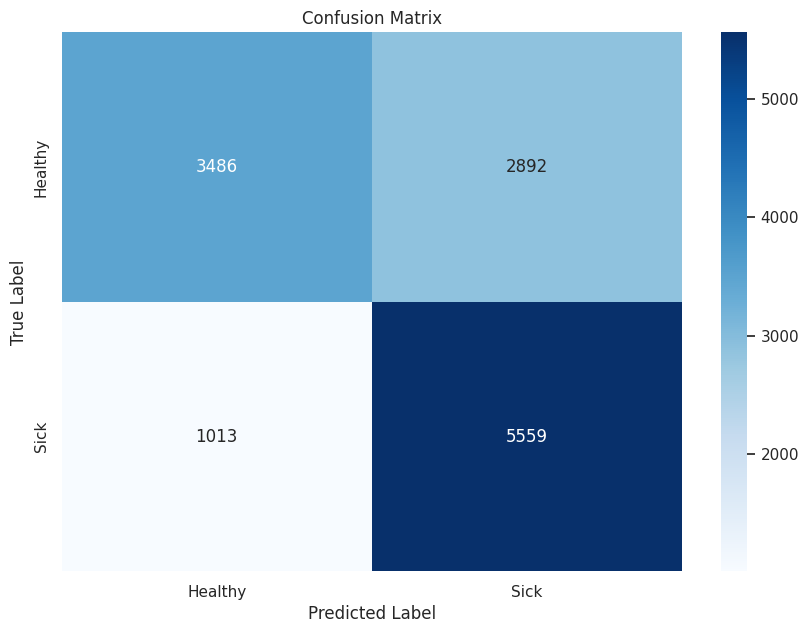

In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = dataset[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'BMI']].values  
y = dataset['cardio'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)


y_pred = X_test_b.dot(theta_best)
y_pred_class = (y_pred > 0.40).astype(int)

accuracy = np.mean(y_test == y_pred_class)
print(f"Точность (Accuracy): {accuracy}")


cm = confusion_matrix(y_test, y_pred_class)
TN, FP, FN, TP = cm.ravel()
print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1}")
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Sick'], yticklabels=['Healthy', 'Sick'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Мы получили итоговое значение по F1-мере: 0.74, что является хорошим показателем. Также я изменил пороговое значения для определения больного с 0.5 на 0.4, сделано это для того, чтобы минимизировать FN, так как лучше предсказать, что человек болен, когда он здоров, чем наоборот.